In [1]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('../Aalok/DataForClustering.csv')
features.head(5)

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Target_FR12Mts
0,12/1/1998,19.039398,32.62500,24.562500,6.44,26.125000,30.234375,27.156250,123.31250,10.27,0.19
1,1/1/1999,19.369415,37.81250,24.296875,6.52,27.468750,29.484375,26.796875,127.65625,10.30,0.09
2,2/1/1999,19.674046,34.06250,24.515625,6.46,27.296875,28.671875,26.515625,123.56250,10.07,0.11
3,3/1/1999,20.257921,36.59375,24.937500,6.57,28.593750,26.687500,26.437500,128.37500,10.06,0.17
4,4/1/1999,21.679529,36.81250,28.687500,6.80,29.343750,29.265625,25.515625,133.25000,10.05,0.09


In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (241, 11)


In [3]:
feature_columns = ['XLF', 'XLK', 'XLI', 'HY', 'XLY', 'XLU', 'XLP', 'SPY', 'VBMFX']
X = features[feature_columns]

In [4]:
y = features.Target_FR12Mts

In [5]:
print(X.shape, y.shape)

(241, 9) (241,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# train_features =X_train, test_features = X_test, train_labels =y_train, test_labels =y_test

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape )
print('Testing Features Shape:',X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (168, 9)
Training Labels Shape: (168,)
Testing Features Shape: (73, 9)
Testing Labels Shape: (73,)


In [9]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 20, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7913928217942106

In [10]:
#Regressor = RandomForestRegressor(max_depth=2, random_state=42)
#Regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred

array([-0.23  ,  0.059 ,  0.136 ,  0.1045,  0.0685,  0.1325,  0.052 ,
        0.128 ,  0.0085, -0.287 ,  0.312 ,  0.105 ,  0.09  ,  0.11  ,
        0.1135,  0.058 ,  0.036 , -0.0735,  0.06  ,  0.154 , -0.016 ,
       -0.129 , -0.324 , -0.0805,  0.096 ,  0.1835, -0.048 ,  0.074 ,
        0.0575,  0.1395, -0.2965,  0.1205, -0.096 ,  0.049 , -0.088 ,
        0.196 , -0.031 ,  0.101 ,  0.1535,  0.1335,  0.0765,  0.077 ,
       -0.2745, -0.0865,  0.1365,  0.082 ,  0.1   , -0.1095,  0.133 ,
       -0.17  ,  0.128 ,  0.1565,  0.118 ,  0.0985,  0.061 ,  0.116 ,
        0.1595,  0.182 ,  0.101 ,  0.0785,  0.1355, -0.07  ,  0.122 ,
        0.0215,  0.0955,  0.1175,  0.0855,  0.1155,  0.0085, -0.1465,
       -0.265 ,  0.0915,  0.0935])

In [34]:
from sklearn import metrics
# Use numpy to convert to arrays
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Sqaured:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.06067808219178082
Mean Squared Error: 0.0057981130136986305
Root Mean Squared Error: 0.07614534137883046
Root Sqaured: 0.7913928217942106


In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.06 degrees.


In [14]:
predictions

array([-0.23  ,  0.059 ,  0.136 ,  0.1045,  0.0685,  0.1325,  0.052 ,
        0.128 ,  0.0085, -0.287 ,  0.312 ,  0.105 ,  0.09  ,  0.11  ,
        0.1135,  0.058 ,  0.036 , -0.0735,  0.06  ,  0.154 , -0.016 ,
       -0.129 , -0.324 , -0.0805,  0.096 ,  0.1835, -0.048 ,  0.074 ,
        0.0575,  0.1395, -0.2965,  0.1205, -0.096 ,  0.049 , -0.088 ,
        0.196 , -0.031 ,  0.101 ,  0.1535,  0.1335,  0.0765,  0.077 ,
       -0.2745, -0.0865,  0.1365,  0.082 ,  0.1   , -0.1095,  0.133 ,
       -0.17  ,  0.128 ,  0.1565,  0.118 ,  0.0985,  0.061 ,  0.116 ,
        0.1595,  0.182 ,  0.101 ,  0.0785,  0.1355, -0.07  ,  0.122 ,
        0.0215,  0.0955,  0.1175,  0.0855,  0.1155,  0.0085, -0.1465,
       -0.265 ,  0.0915,  0.0935])

In [15]:
rf_new = RandomForestRegressor(n_estimators = 200, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [20]:
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 13


In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: XLI                  Importance: 0.36
Variable: XLP                  Importance: 0.13
Variable: XLF                  Importance: 0.09
Variable: XLU                  Importance: 0.09
Variable: Date                 Importance: 0.08
Variable: SPY                  Importance: 0.08
Variable: XLK                  Importance: 0.06
Variable: HY                   Importance: 0.06
Variable: XLY                  Importance: 0.06


In [22]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

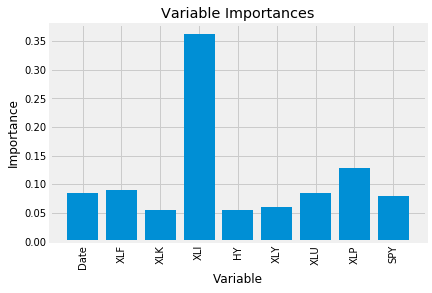

In [24]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [30]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [32]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train, y_train)
# train_features =X_train, test_features = X_test, train_labels =y_train, test_labels =y_test
# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');
